In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

Label of Image:  4


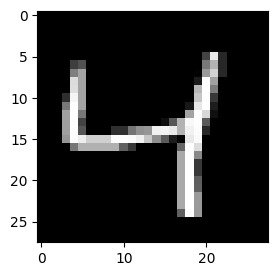

In [5]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[2], cmap = 'gray')

print('Label of Image: ', y_train[2])

In [6]:
train = X_train.reshape(X_train.shape[0], 28*28)
test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
train.shape

(60000, 784)

In [8]:
train.ndim

2

In [9]:
print(np.max(train))
print(np.min(train))

255
0


In [10]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
train = mms.fit_transform(train)
test = mms.transform(test)

In [11]:
print(np.max(train))
print(np.min(train))

1.0
0.0


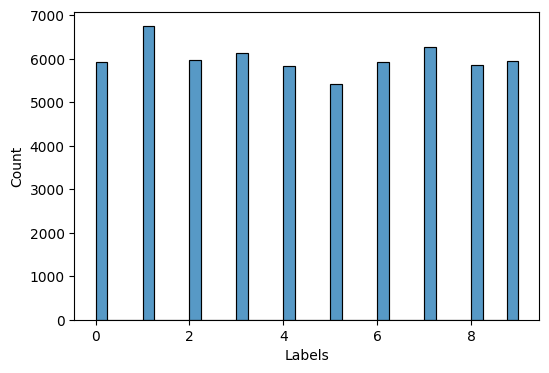

In [12]:
plt.figure(figsize=(6,4))
plt.xlabel('Labels')
sns.histplot(y_train);

## Softmax Regression

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(multi_class='multinomial', random_state = 42) # Softmax Regression

In [14]:
LR.fit(train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [15]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import norm

In [16]:
# params = [
#     {'C': norm(0,2),
#      'solver': ['saga', 'liblinear']
#     }
# ]

# rs = RandomizedSearchCV(LR, param_distributions=params, verbose=1, cv=2, random_state=42, n_jobs=-1)

# rs.fit(train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
14 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

RandomizedSearchCV(cv=2,
                   estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2856f9d330>,
                                         'solver': ['saga', 'liblinear']}],
                   random_state=42, verbose=1)

In [17]:
rs.best_params_

{'C': 0.6378043693787667, 'solver': 'saga'}

In [18]:
rs.best_score_

0.9167166666666666

## PCA and LogReg using pipeline

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [20]:
pipe = Pipeline([
    ('pca', PCA(n_components = 0.95)),
    ('clf', LR)
])

In [21]:
pipe.fit(train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('clf',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=42))])

In [22]:
pred = pipe.predict(test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9227

## Ensemble Methods: Random Forest, Adaboost Classifier and Gradient Boosting

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#### Random forest

In [25]:
RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)

In [26]:
RF.fit(train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [27]:
RF.score(train, y_train)

1.0

In [28]:
RF.score(test, y_test)

0.9672

#### AdaBoost

In [29]:
abc = AdaBoostClassifier(estimator = LR, n_estimators = 20, random_state = 42)

abc.fit(train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(multi_class='multinomial',
                                                random_state=42),
                   n_estimators=20, random_state=42)

In [30]:
abc.score(train,y_train)

0.83995

In [31]:
abc.score(test, y_test)

0.8401

In [32]:
# params = [
#     {
#         'learning_rate': [0.1,0.5,0.8],
#         'estimator__C': [1e-2, 1, 10]
#     }
# ]

# gs = GridSearchCV(abc, param_grid = params, cv = 5, n_jobs = -1)
# gs.fit(train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=LogisticRegression(multi_class='multinomial',
                                                                       random_state=42),
                                          n_estimators=20, random_state=42),
             n_jobs=-1,
             param_grid=[{'estimator__C': [0.01, 1, 10],
                          'learning_rate': [0.1, 0.5, 0.8]}])

In [33]:
print('Best Score: ', gs.best_score_)
print('Best Params: ', gs.best_params_)

Best Score:  0.8732
Best Params:  {'estimator__C': 10, 'learning_rate': 0.1}


#### Gradient Boost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 20, loss = 'log_loss', random_state = 42)
gbc.fit(train, y_train)

print(gbc.score(train,y_train))
print(gbc.score(test,y_test))

0.88355
0.8843
